<a href="https://colab.research.google.com/github/yunhsuan1009/yunhsuan/blob/main/hw03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：鑽石數據分析報告

## 摘要

本報告將基於 seaborn 提供的 diamonds 資料集，探討鑽石的各種屬性與其價格之間的關係。透過數據視覺化與統計分析，本報告將深入探討：

鑽石克拉數 (carat) 與價格 (price) 之間的關係：分析克拉數如何影響鑽石的價格，並找出其中的趨勢與潛在的非線性關係。

不同顏色 (color) 和淨度 (clarity) 的鑽石分佈與價格表現：比較不同品質等級的鑽石數量分佈，並分析這些屬性如何影響鑽石的價格，例如哪種淨度或顏色通常會有更高的價格。

## 引言

### 背景
在鑽石市場中，鑽石的定價機制複雜，受到多種因素的影響。除了最直觀的克拉數 (carat)，鑽石的切工 (cut)、顏色 (color)、淨度 (clarity)，以及鑽石的物理尺寸 (dimension) 都會對其價值產生顯著影響。理解這些因素如何交互作用並最終決定鑽石的價格，對於消費者做出明智的購買決策，以及業者進行精準的市場定價都至關重要。

### 目的
本研究的目標是透過對鑽石資料集的數據分析，找出影響鑽石價格的主要因素，並提供可行的見解，以幫助消費者更好地理解鑽石價值。

### 待答問題
1. 克拉(carat)與鑽石價格(price)是否存在線性關係
2. 鑽石淨度(clarity)如何影響每種淨度的平均價格、鑽石數量
3. 不同顏色的鑽石對價格高低影響的情形

## 方法

### 數據來源
本研究使用 `seaborn` 內建的 `diamonds` 數據集，這是來自 ggplot2 的一個知名資料集，收錄了 超過 5 萬顆鑽石 的屬性與價格資料。

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Seaborn**（數據視覺化）

### 數據處理
1. 載入 `diamonds` 數據集並檢視數據概況。
2. 探索性數據分析（EDA）以了解數據分佈與異常值。
3. 繪製散點圖、長條圖、盒狀圖等，分析關鍵變數之間的關係。

In [3]:
import seaborn as sns
import pandas as pd
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

diamonds = sns.load_dataset("diamonds")

print(diamonds.head())

diamonds.info()

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float6

## 結果與分析

### 克拉(carat)與鑽石價格(price)的關係
使用散點圖來觀察克拉(carat)與鑽石價格(price)之間的關係。

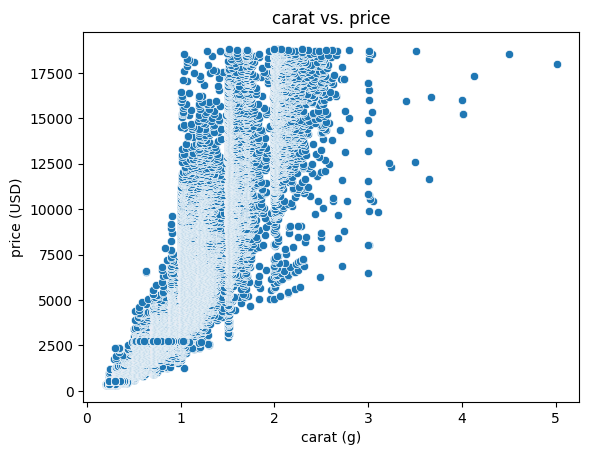

In [9]:
sns.scatterplot(x="carat", y="price", data=diamonds)
plt.title("carat vs. price")
plt.xlabel("carat (g)")
plt.ylabel("price (USD)")
plt.show()

**分析結果**：從圖中可以看出，克拉(carat)克數越高，價格通常也越高，但並非線性關係。

### 鑽石淨度(clarity)和每種淨度的平均價格、鑽石數量
*淨度: 鑽石淨度等級可分為 6 大類別：FL 級（完美無瑕）、IF 級（內部無瑕）、VVS 級（極輕微瑕） 、VS 級（輕微內含）、SI 級（微內含）與 I 級（內含），總共 11 種的淨度等級。內部的瑕疵又稱為內含物＂ Included＂，越少內含物及外部瑕疵的鑽石，價值就越高。

我統計鑽石淨度(範圍:I1（最差）到 IF（最好）)與鑽石的平均價格、鑽石數量，並使用長條圖呈現。

<ipython-input-10-419929094>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clarity_avg_price = diamonds.groupby("clarity")["price"].mean()


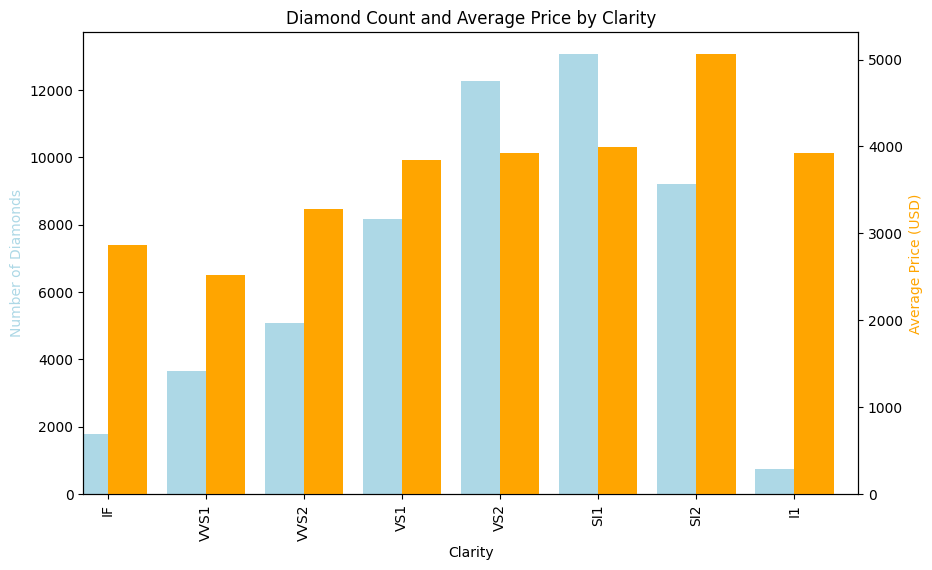

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# 載入 diamonds 資料集
diamonds = sns.load_dataset("diamonds")

# 計算 clarity 出現次數（鑽石數量）
clarity_counts = diamonds["clarity"].value_counts().sort_index()

# 計算每種 clarity 的平均價格
clarity_avg_price = diamonds.groupby("clarity")["price"].mean()

# 繪圖
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# 左軸：鑽石數量
clarity_counts.plot(kind='bar', ax=ax1, color='lightblue', position=1, width=0.4)
ax1.set_ylabel("Number of Diamonds", color='lightblue')
ax1.set_xlabel("Clarity")
ax1.set_title("Diamond Count and Average Price by Clarity")

# 右軸：平均價格
clarity_avg_price.loc[clarity_counts.index].plot(kind='bar', ax=ax2, color='orange', position=0, width=0.4)
ax2.set_ylabel("Average Price (USD)", color='orange')

plt.show()


**分析結果**
VS2 和 SI1 的鑽石數量最多，反映市場供應集中於中等淨度。而平均價格最高的為 SI2，顯示即便淨度較低，若克拉數夠大仍可以推升價格。此外，雖然 IF 和 VVS1 等級代表高品質，但其平均價格並不高，可能因其重量較小所致。因此，價格受到不只clarity，還包含 carat、color 等綜合因素影響。I1淨度最差，因此數量也最少，IF雖為最高等級，但數量也非常少，可見其稀有性

### 不同顏色的鑽石價格高低情形
GIA 的鑽石顏色等級分為 5 大類別： 由 D 到 Z，等級高到低依序為無色 ( D ~ F )、近乎無色 ( G ~ J )、微黃 ( K ~ M )、輕淺黃 ( N ~ R ) 與淺黃 ( S ~ Z )，透明無色的鑽石極為稀有，因此等級越高的鑽石越接近無色。

我們比較不同鑽石顏色(僅分析D-J)和價格數據，使用盒狀圖進行分析。

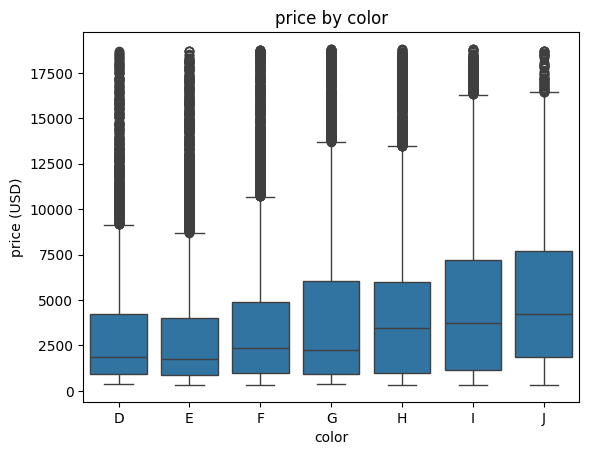

In [11]:

sns.boxplot(x="color", y="price", data=diamonds)
plt.title("price by color")
plt.xlabel("color")
plt.ylabel("price (USD)")
plt.show()

**分析結果**

雖然 D、E、F 顏色的鑽石在分級上較優，但在實際價格上，中位數反而低於 H、I、J 等色澤偏黃的鑽石。這可能是因為顏色等級低的鑽石通常重量較大，導致整體價格較高。同時，也觀察到 H 至 J 顏色的鑽石價格變異性更大，顯示其市場價格受其他因素（如 carat、cut、clarity）影響更多。

## 結論與建議


### 結論
1. 克拉與鑽石價格之間存在一定的正相關性，但非線性。
2. 市場供應集中於中等淨度鑽石，淨度最差集最佳的數量都不多
3. 即便鑽石在分級上較優，價格未必越高
4. 評估鑽石價格不能只考慮單一因素，因為市場價格受其他因素（如 carat、cut、clarity）並且相互影響的情況更多。

### 建議
1. 在購買鑽石之前，務必徹底了解該鑽石的基本資訊。這能幫助您避免花大錢卻買到品質不如預期的鑽石。

